In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer

In [2]:
def file_path(x):
    y = pd.read_csv(x)
    return y


df_train = file_path(r"C:/Users/kevin/datasets/gold_recovery_full.csv")

df_test = file_path(r"C:/Users/kevin/datasets/gold_recovery_test.csv")

df_full = file_path(r"C:/Users/kevin/datasets/gold_recovery_full.csv")

In [3]:
# 1.2 
# Check that recovery is calculated correctly. 
# Using the training set, calculate recovery for the rougher.output.recovery feature. 
# Find the MAE between your calculations and the feature values. Provide findings.

C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery = (C * (F - T)) / (F * (C - T)) * 100

actual_recovery = df_train['rougher.output.recovery']

mae = abs(recovery - actual_recovery).mean()

print('Mean Absolute Value:',mae)



Mean Absolute Value: 9.849655974293876e-15


# Data preprocessing.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [6]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [9]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [11]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [12]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [13]:
full_merge = df_full[['date','rougher.output.recovery', "final.output.recovery"]]
df_test = df_test.merge(full_merge, on='date', how="left")

In [14]:
df_train = df_train.drop('date',axis=1)
df_test = df_test.drop('date',axis=1)
df_full = df_full.drop('date',axis=1)

In [15]:
print(df_test.shape)
print(df_train.shape)
print(df_full.shape)

(5856, 54)
(22716, 86)
(22716, 86)


In [16]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

22
6
22


In [17]:
def drop(df):

    df = df.drop_duplicates(inplace=True)
    return df

print(drop(df_train))
print(drop(df_test))
print(drop(df_full))

None
None
None


In [18]:
print('Training Set')
print(df_train.isna().sum())
print('')
print('Test Set')
print(df_test.isna().sum())
print('')
print('Source Set')
print(df_full.isna().sum())

Training Set
final.output.concentrate_ag                     81
final.output.concentrate_pb                     79
final.output.concentrate_sol                   377
final.output.concentrate_au                     78
final.output.recovery                         1941
                                              ... 
secondary_cleaner.state.floatbank5_a_level      79
secondary_cleaner.state.floatbank5_b_air        79
secondary_cleaner.state.floatbank5_b_level      78
secondary_cleaner.state.floatbank6_a_air        97
secondary_cleaner.state.floatbank6_a_level      79
Length: 86, dtype: int64

Test Set
primary_cleaner.input.sulfate                 296
primary_cleaner.input.depressant              278
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                160
primary_cleaner.state.floatbank8_a_air         10
primary_cleaner.state.floatbank8_a_level       10
primary_cleaner.state.floatbank8_b_air         10
primary_cleaner.state.floatbank8_b_level 

In [19]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_full = df_full.dropna()

We dropped all missing values, because any NaN value can disrupt the technological process and bring inaccurate data reuslts

# 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [20]:
gold_au = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
gold_au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


Text(0.5, 1.0, 'Gold')

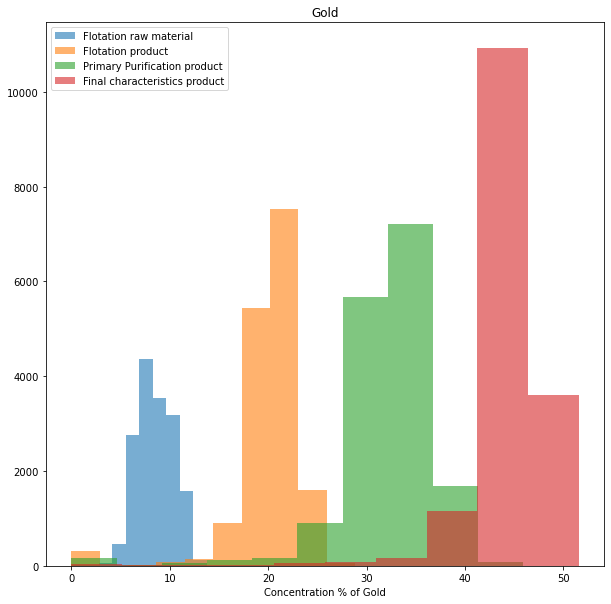

In [21]:
fig = plt.figure(figsize=(10, 10))

plt.hist(gold_au['rougher.input.feed_au'], alpha=0.6, label='Flotation raw material')
plt.hist(gold_au['rougher.output.concentrate_au'], alpha=0.6, label='Flotation product')
plt.hist(gold_au['primary_cleaner.output.concentrate_au'], alpha=0.6, label='Primary Purification product')
plt.hist(gold_au['final.output.concentrate_au'], alpha=0.6, label='Final characteristics product')

plt.xlabel('Concentration % of Gold')
plt.legend(loc='upper left')
plt.title('Gold')

In [22]:
silver_ag = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
silver_ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


Text(0.5, 1.0, 'Silver')

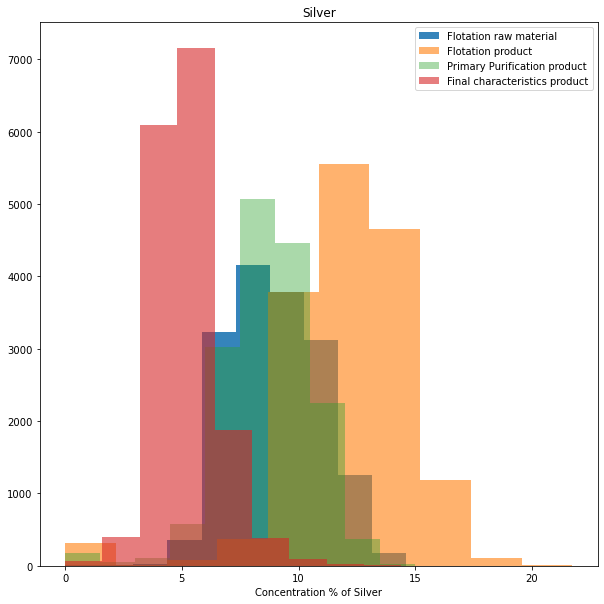

In [23]:
fig = plt.figure(figsize=(10, 10))

plt.hist(silver_ag['rougher.input.feed_ag'], alpha=0.9, label='Flotation raw material')
plt.hist(silver_ag['rougher.output.concentrate_ag'], alpha=0.6, label='Flotation product')
plt.hist(silver_ag['primary_cleaner.output.concentrate_ag'], alpha=0.4, label='Primary Purification product')
plt.hist(silver_ag['final.output.concentrate_ag'], alpha=0.6, label='Final characteristics product')

plt.xlabel('Concentration % of Silver')
plt.legend(loc='upper right')
plt.title('Silver')

In [24]:
lead_Pb = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
lead_Pb.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


Text(0.5, 1.0, 'Lead')

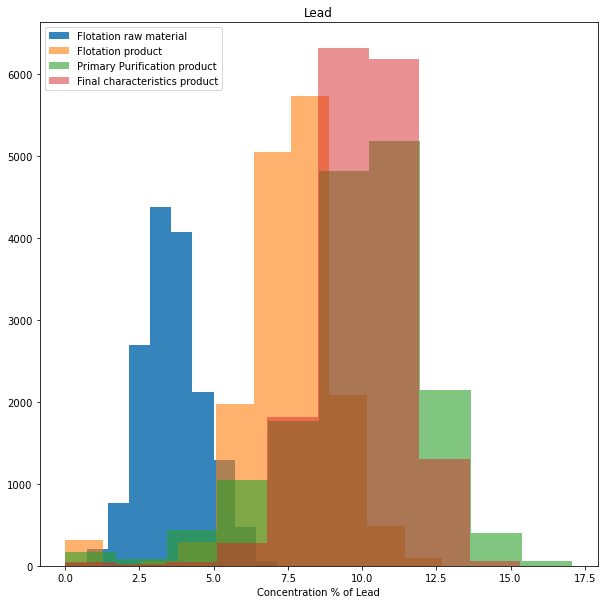

In [25]:
fig = plt.figure(figsize=(10, 10))

plt.hist(lead_Pb['rougher.input.feed_pb'], alpha=0.9, label='Flotation raw material')
plt.hist(lead_Pb['rougher.output.concentrate_pb'], alpha=0.6, label='Flotation product')
plt.hist(lead_Pb['primary_cleaner.output.concentrate_pb'], alpha=0.6, label='Primary Purification product')
plt.hist(lead_Pb['final.output.concentrate_pb'], alpha=0.5, label='Final characteristics product')

plt.xlabel('Concentration % of Lead')
plt.legend(loc='upper left')
plt.title('Lead')

We have included all potential concentrations for each metal combined in one histogram. Now, the grpahs below will reflect each stage of the technological metal split up by metal. This will give a ideas of how each metal compares to one another by stage. 

## Flotation raw material parameters - rougher.input.feed

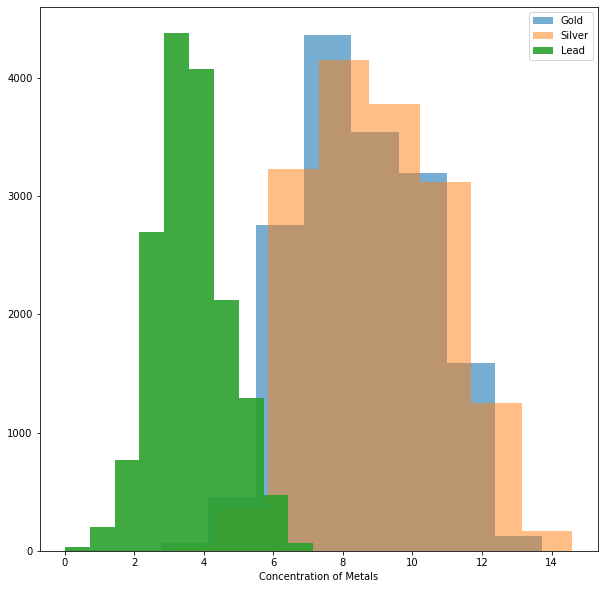

In [26]:
fig = plt.figure(figsize=(10, 10))
plt.hist(gold_au['rougher.input.feed_au'], alpha=0.6, label='Gold')
plt.hist(silver_ag['rougher.input.feed_ag'], alpha=0.5, label='Silver')
plt.hist(lead_Pb['rougher.input.feed_pb'], alpha=0.9, label='Lead')


# add labels and legend
plt.xlabel('Concentration of Metals')
plt.legend(loc='upper right')

# show the plot
plt.show()

## Flotation product parameters - rougher.output.concentrate

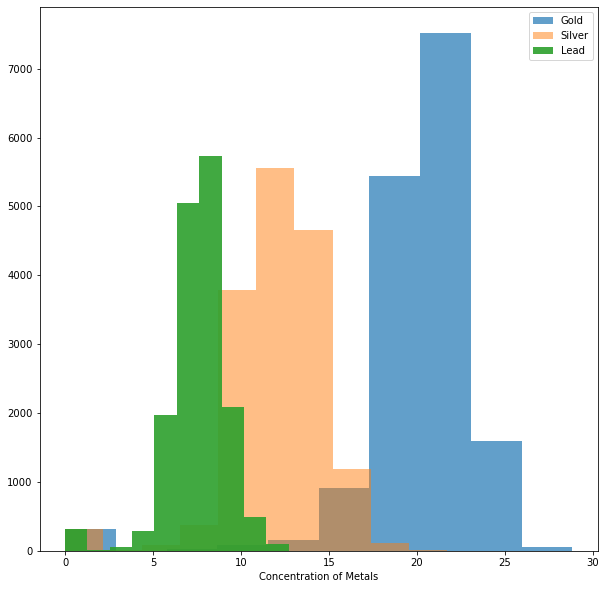

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.hist(gold_au['rougher.output.concentrate_au'], alpha=0.7, label='Gold')
plt.hist(silver_ag['rougher.output.concentrate_ag'], alpha=0.5, label='Silver')
plt.hist(lead_Pb['rougher.output.concentrate_pb'], alpha=0.9, label='Lead')


plt.xlabel('Concentration of Metals')
plt.legend(loc='upper right')



plt.show()

##  Primary Purification product parameters - primary_cleaner.output.concentrate

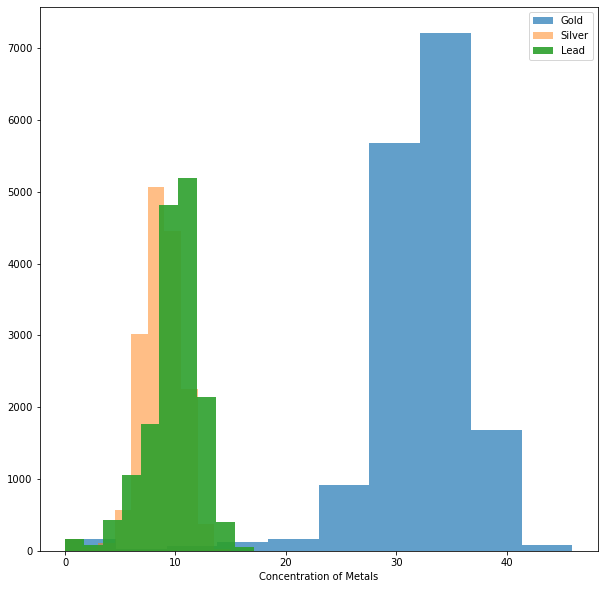

In [28]:
fig = plt.figure(figsize=(10, 10))
plt.hist(gold_au['primary_cleaner.output.concentrate_au'], alpha=0.7, label='Gold')
plt.hist(silver_ag['primary_cleaner.output.concentrate_ag'], alpha=0.5, label='Silver')
plt.hist(lead_Pb['primary_cleaner.output.concentrate_pb'],alpha=0.9, label='Lead')


plt.xlabel('Concentration of Metals')
plt.legend(loc='upper right')



plt.show()

## Final characteristics product parameters - final.output.concentrate

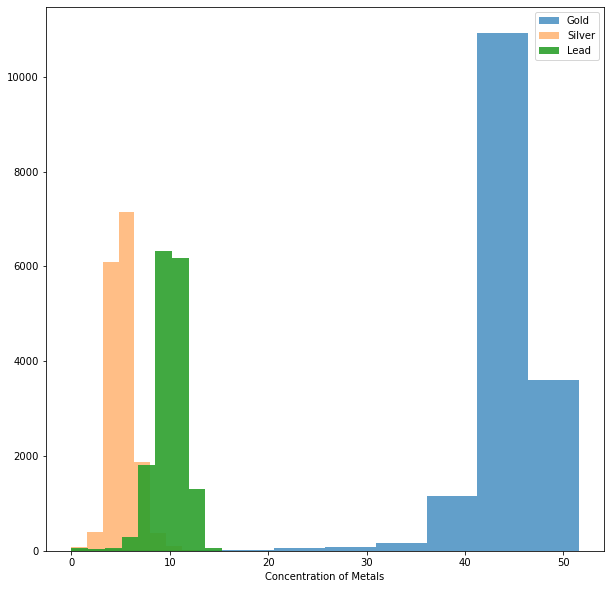

In [29]:
fig = plt.figure(figsize=(10, 10))
plt.hist(gold_au['final.output.concentrate_au'], alpha=0.7, label='Gold')
plt.hist(silver_ag['final.output.concentrate_ag'], alpha=0.5, label='Silver')
plt.hist(lead_Pb['final.output.concentrate_pb'], alpha=0.9, label='Lead')


plt.xlabel('Concentration of Metals')
plt.legend(loc='upper right')



plt.show()

# 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [30]:
# primary_cleaner.input.feed_size During Purification
df_test['primary_cleaner.input.feed_size']

0       8.080000
1       8.080000
2       7.786667
3       7.640000
4       7.530000
          ...   
5851    8.070000
5852    8.070000
5853    8.070000
5854    8.070000
5855    8.070000
Name: primary_cleaner.input.feed_size, Length: 5229, dtype: float64

In [31]:
df_train['primary_cleaner.input.feed_size']

0        7.25
1        7.25
2        7.25
3        7.25
4        7.25
         ... 
22711    6.50
22712    6.50
22713    6.50
22714    6.50
22715    6.50
Name: primary_cleaner.input.feed_size, Length: 16094, dtype: float64

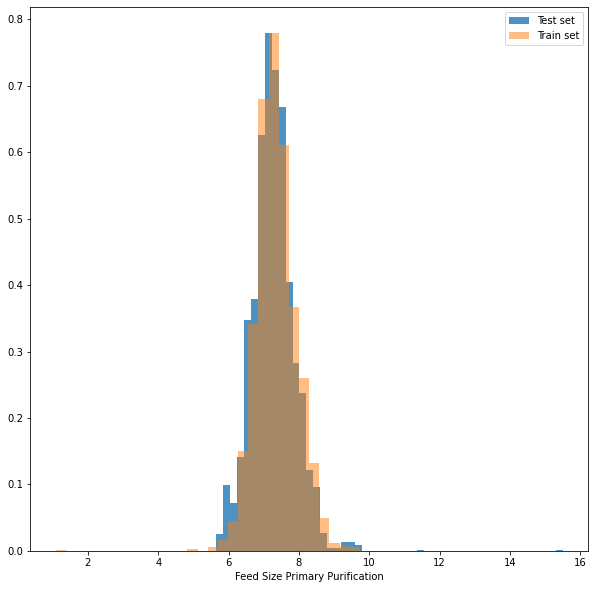

In [32]:
fig = plt.figure(figsize=(10, 10))
plt.hist(df_test['primary_cleaner.input.feed_size'], alpha=0.8,bins=50,label='Test set',density=True)
plt.hist(df_train['primary_cleaner.input.feed_size'], alpha=0.5,bins=50,label='Train set',density=True)
plt.xlabel('Feed Size Primary Purification')
plt.legend(loc='upper right')




In [33]:
# rougher.input.feed_size During Flotation

#Test Set
df_test['rougher.input.feed_size']

0       62.710452
1       61.961163
2       66.903807
3       59.865919
4       63.315324
          ...    
5851    66.758479
5852    62.560684
5853    73.647513
5854    78.066446
5855    77.678700
Name: rougher.input.feed_size, Length: 5229, dtype: float64

In [34]:
#Training Set
df_train['rougher.input.feed_size']

0         55.486599
1         57.278666
2         57.510649
3         57.792734
4         56.047189
            ...    
22711     85.718304
22712    119.499241
22713    122.262690
22714    123.742430
22715     94.544358
Name: rougher.input.feed_size, Length: 16094, dtype: float64

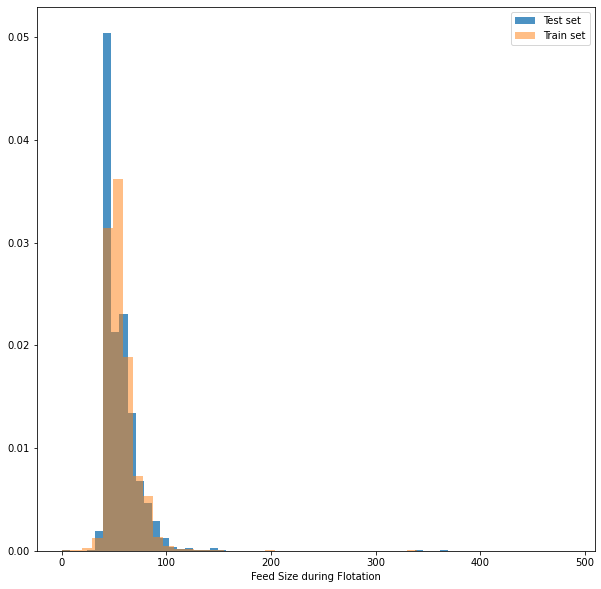

In [35]:
fig = plt.figure(figsize=(10, 10))
plt.hist(df_test['rougher.input.feed_size'], alpha=0.8, bins=50, label='Test set',density=True)
plt.hist(df_train['rougher.input.feed_size'], alpha=0.5,bins=50, label='Train set',density=True)
plt.xlabel('Feed Size during Flotation')
plt.legend(loc='upper right')

Comparing te feed size in flotation and purification, the training  and test set have a similar distribution. 

# 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [36]:
total_concentrations_rougherinput = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb']
total_concentrations_rougheroutput = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb']
total_concentrations_primarycleaner = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb']
total_concentrations_finaloutput = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb']

Text(0.5, 0, 'Total Cocentration of Metals by Stage %')

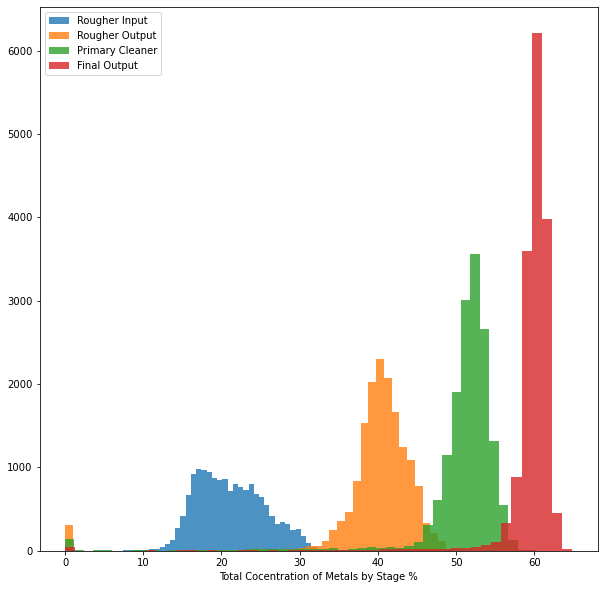

In [37]:
fig = plt.figure(figsize=(10, 10))
plt.hist(total_concentrations_rougherinput, alpha=0.8, bins=50, label='Rougher Input')
plt.hist(total_concentrations_rougheroutput, alpha=0.8, bins=50, label='Rougher Output')
plt.hist(total_concentrations_primarycleaner, alpha=0.8, bins=50, label='Primary Cleaner')
plt.hist(total_concentrations_finaloutput, alpha=0.8, bins=50, label='Final Output')

plt.legend(loc='upper left')
plt.xlabel('Total Cocentration of Metals by Stage %')

The metals see a consistent increase of concentration as it goes through the technological process. 

# 3.1. Write a function to calculate the final sMAPE value.

We need to predict two values:

rougher concentrate recovery : rougher.output.recovery

final concentrate recovery : final.output.recovery

In [38]:
# Get the list of columns in df_test
test_columns = df_test.columns.tolist()

# Filter df_train to only include the columns in test_columns
df_train = df_train.filter(items=test_columns)


target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

features_train = df_train.drop([target_rougher, target_final], axis=1)
target_train = df_train[[target_rougher, target_final]]


features_test = df_test.drop([target_rougher, target_final], axis=1)
target_test = df_test[[target_rougher, target_final]]

Based on the comment above...What do you want me to do? I don't understand....I had to filter it because my functions were not working and balanced.

In [39]:
# Define the sMAPE metric
def smape(actual, predicted):
    numerator = np.abs(predicted - actual)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    smape = np.mean(numerator / denominator) * 100
    return smape

def final_smape(aws, pred):
    rougher = smape(aws.iloc[:, 0], pred[:,0])
    final = smape(aws.iloc[:,1], pred[:,1])
    return .25 * rougher + .75 * final

In [40]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

# 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

## Linear Regression

In [41]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_train)


scores = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_scorer)

# Print the mean absolute error
print("Final sMAPE:",-scores.mean())

Final sMAPE: 10.147900394090094


## Decision Tree Regressor

In [42]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(features_train, target_train)
predictions = model.predict(features_train)

scores = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_scorer)

print("Final sMAPE:",scores.mean())

Final sMAPE: -9.949277722236207


## Random Forest Regressor

Takes a while to load

In [43]:
# Takes a while to load

model = RandomForestRegressor(n_estimators=50,max_depth=5, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_train)


scores = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_scorer)

# Print the mean absolute error
print("Final sMAPE:",scores.mean())

Final sMAPE: -9.134818508849312


## Dummy Regresor using Mean and Median

In [44]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train)
predictions = model.predict(features_train)

scores = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_scorer)


print("Final sMAPE:",scores.mean())

Final sMAPE: -9.775508098458342


In [45]:
model = DummyRegressor(strategy="median")
model.fit(features_train, target_train)
predictions = model.predict(features_train)

scores = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_scorer)


print("Final sMAPE:",scores.mean())


Final sMAPE: -9.61453890979234


# Best Model 

In [46]:
# Takes a while to load

model = RandomForestRegressor(n_estimators=50,max_depth=5, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)

scores_final_smape = final_smape(target_test, predictions)

print("Final sMAPE:",scores_final_smape)


Final sMAPE: 7.635740705909593


# Conclusion

During the technological process, the total amount of concentration % consistently progressed during differen stages of the process. Although, gold substaintially became more purified than lead and silver. After cleaning, analyzing, and testing different models, the RandomForestRegressor is our best model with a final sMAPE score of 9.25422793928751 giving the best indication how much gold was recovered from gold ore. 